<a href="https://colab.research.google.com/github/ggoddll99/24-2ESAA/blob/main/241108_%EA%B3%BC%EC%A0%9C_%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **01. 딥러닝 준비**

* 텐서플로가 케라스 API를 내제화했다.
* 케라스 API : 프랑스 엔지니어인 프랑소와 숄레가 만든 고수준의 딥러닝 라이브러리
  * GPU 연산을 수행하는 기능을 직접 실행하지 않고 텐서플로, CNTK, Theano, MXNet 등의 백엔드 엔진을 지정하여 사용한다.
  * 딥러닝 라이브러리를 쉽고 간결한 코드로 실행할 수 있게 한다.
  * 직관적, 사용자 친화적 설계
  * 백엔드 엔진을 쉽게 변경할 수 있다.
  * (한계) 복잡한 구조의 모델 구현과 사용자 정의 훈련을 위해서는 텐서플로의 저수준 API를 활용해야 한다.


## **1-1. 주요 용어**

### **1-1-1. 하이퍼파라미터**

* 하이퍼파라미터 : 모델을 훈련할 때 사용자가 직접 설정해주는 설정 값. 학습 속도, 반복 훈련 횟수 등 사용자가 직접 설정해야 하는 값. 사용자가 어떤 값을 설정하느냐에 따라 모델의 성능 및 결과가 달라진다. 사용자가 별도로 설정해주지 않으면 기본값이 저장되어 있어 자동으로 적용된다.
* 가중치(weights), 편향(bias) : 자동 업데이트되고 조정되는 값
* 하이퍼파라미터 튜닝 : 하이퍼파라미터 값을 조절하는 행위. 모델의 예측 성능을 높이기 위해 하이퍼파라미터 값들을 조절하는 데 많은 시간을 투자하는 것이 일반적이다.
* 딥러닝 프로젝트 실행 초기 단계에 튜닝에 시간을 투자하는 것보다 가장 마지막 단계에 진행하는 것을 추천한다.

### **1-1-2. 과소적합(underfitting) vs. 과대적합(overfitting)**

* 훈련용 데이터 : 머신러닝 모델이 학습할 데이터. training set, train set.
* 예측용 데이터 : 정답 레이블(label)이 없는 머신러닝 모델이 예측해야 하는 대상 데이터. test set

* 훈련 데이터에서 패턴 학습을 통해 모델을 완성한다. 훈련용 데이터를 반복적으로 학습하면서 사람이 발견하지 못하는 패턴을 발견함으로써 사람의 예측 성능을 뛰어 넘는 모델을 생성할 수 있다.
* 하지만 예측용 데이터가 모델이 학습한 데이터와 다른 분포를 갖거나 학습한 데이터가 특정 레이블에 편향된 데이터로 이루어져 있다면 모델이 학습한 후 예측 성능이 현저히 떨어지게 된다.
* 과소적합 : 모델이 충분히 학습되지 않은 경우 예측 성능이 떨어지는 상태
* 과대적합 : 학습 데이터를 지나치게 반복 학습하게 되어 과하게 적합된 상태. 훈련 데이터에 존재하는 불필요한 노이즈까지 과도하게 모델에 반영되어 주어진 훈련 데이터에 대한 예측 성능이 좋지만, 중요한 예측 데이터에 대한 예측 오차가 발생할 확률이 커진다.
➡️과소적합과 과대적합 문제를 최소화하면서 정확도를 가장 높일 수 있도록 해야 한다.
  * 훈련 데이터를 잘 구성한다. 예측 데이터와 분포가 동일하게 구성해야 하며 불필요한 노이즈는 데이터 분석 및 전처리를 통해 해소해야 한다.
  * 검증 데이터 활용 : 훈련 데이터의 일부를 검증 데이터로 활용하여 검증 성능이 가장 좋은 구간을 모델의 가장 이상적으로 학습된 지점이라 판단하는 방법으로 최종 모델을 결정한다.

### **1-1-3. 에포크(epoch)**

* 딥러닝 : 데이터셋을 학습하는 과정을 여러 번 반복(iteration)하면서 최적의 모델 가중치를 찾는 과정
* 1 epoch(에포크) : 딥러닝 모델이 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프(loop)
* 훈련 데이터셋을 빠짐없이 모두 1번 모델 훈련에 사용하면 1epoch의 훈련 과정을 마치고 다음 epoch로 넘어간다. 사전에 설정된 최대 epoch 횟수까지 반복적으로 진행하고 종료된다.
* `epoch` : 하이퍼파라미터. 사전에 설정한 최대 epoch까지 반복 학습이 끝나더라도 모델이 과소적합되었다고 판단되면 epoch를 늘려 다시 학습한다. 만약 모델이 빠르게 과대적합 구간으로 진입한다면 epoch를 줄여 최적 구간에서 학습을 조기에 종료하는 것이 과대적합을 방지하고 시간을 절약할 수 있다.

### **1-1-4. 손실함수(loss function)**

* 손실함수 : 예측 값과 정답 값의 차이 또는 오차(error)
* 오차 : 딥러닝 모델의 출력 값과 실제 값의 차이
* 지도 학습(supervised learning)
  * 분류
    * 이진 분류 : 손실함수 `binary_crossentropy`, 출력층의 활성화 함수(activation function) : `sigmoid`
    * 다중 분류 : 손실함수 `categorical_crossentropy`, 다중 분류의 대상이 되는 클래스가 원핫 벡터인 경우 사용, 출력층의 활성함수 `softmax`
      * 정답 클래스가 원핫 인코딩이 아닌 레이블 값(0, 1, 2, 3, ...)으로 표현되어 서로 다른 숫자로 구분되어 있으면 손실함수 `sparse_categorical_crossentropy`
  * 회귀 : 평균제곱오차(MSE), 평균절대값오차(MAE), 후버(Huber)

텐서플로는 사전 정의된 손실함수를 함수영과 클래스형으로 제공하고 있으며, 일반적으로 많이 사용하는 손실함수 목록은 다음과 같다.

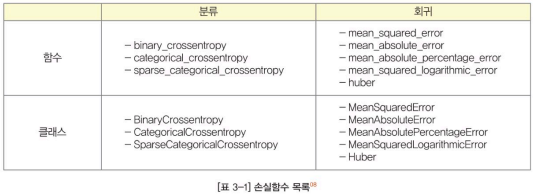

```
import tensorflow as tf

# 클래스
tf.keras.losses.BinaryCrossentropy()

# 함수
tf.keras.losses.binary_crossentropy
```
* 딥러닝 문제에 따라서는 텐서플로에서 제공하는 손실함수로 해결하기 어려운 경우가 있다. 이럴 때는 사용자가 직접 손실함수를 만들어서 사용해야 한다. 기본 제공 손실함수와 같이 함수 형태나 클래스 형태 모두 가능하다.

### **1-1-5. 경사하강법(gradient descent)**

* 경사하강법 : 딥러닝 모델을 훈련할 때, 모델 내부의 가중치(weight)에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 결국 최소 함수 값을 갖도록 하는 방법이다.

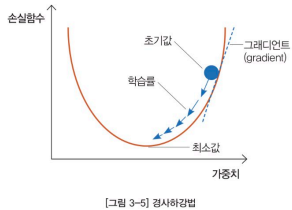

경사하강법 알고리즘을 적용하여 손실함수 값을 최소로 만드는 가중치를 찾을 수 있다. 경사하강법은 현재 공개된 다양한 옵티마이저(최적화 함수)의 근간이 되는 알고리즘이다.

손실함수(Loss Function), 목적 함수

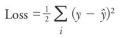

1/2는 가중치에 대한 그래디언트를 계산하기 쉽도록 추가한 상수 값이다.

단순 선형회귀 수식이 주어졌을 때 손실함수를 최소로 하는 w와 b를 구하는 과정을 경사하강법으로 구현한다.

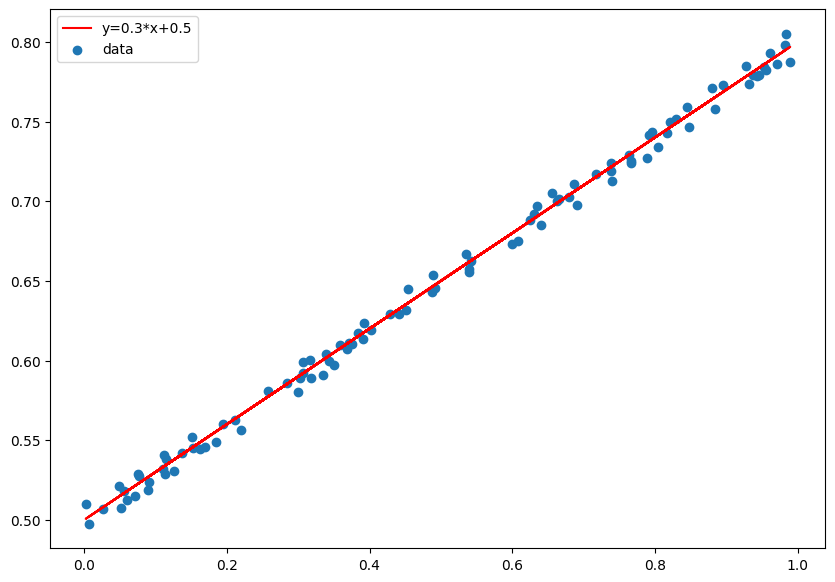

w : 0.3, b : 0.5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
  x=np.random.rand(size)
  y=w*x+b
  noise=np.random.uniform(-abs(noise), abs(noise), size=y.shape)
  yy=y+noise
  plt.figure(figsize=(10, 7))
  plt.plot(x, y, color='r', label=f'y={w}*x+{b}')
  plt.scatter(x, yy, label='data')
  plt.legend()
  plt.show()
  print(f'w : {w}, b : {b}')
  return x, yy

x, y=make_linear(w=0.3, b=0.5, size=100, noise=0.01)

그래디언트는 손실함수를 w, b에 대한 각각의 편미분 값을 구한 뒤 학습률 계수를 곱하여 이전의 w, b로부터 차감한다.

손실함수를 w에 대한 편도함수로 유도하면 다음과 같다.

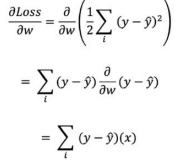

가중치 변화량인 그래디언트는 가중치 w에 대한 편도함수를 말하며 다음과 같이 정의할 수 있다.

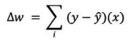

그래디언트 w 업데이트 최종 수식은 다음과 같이 최종 정의할 수 있다.

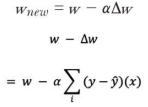

그래디언트 w를 구했듯이 똑같은 방식으로 그래디언트 b를 구할 수 있다. 손실함수를 b에 대한 편도함수를 유도하면 다음과 같다.

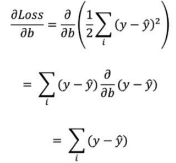

w와 마찬가지로 학습률을 곱하여 그래디언트 b 업데이트 최종 수식을 구하면 다음과 같다.

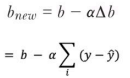

그래디언트 w, b를 업데이트하는 수식을 구했다면 넘파이로 최적화하는 과정을 구현한다. 최대 반복 횟수를 지정하고 오차가 0.005 이내로 수렴하면 반복문을 종료한다. 반복문 안에서 손실함수를 정의하고, 매 epoch마다 w, b에 대한 가중치를 업데이트한다.

In [ ]:
# 최대 반복 횟수
num_epoch=1000

# 학습률(learning_rate)
learning_rate=0.005

# 에러 기록
errors=[]

# random한 값으로 w, b를 초기화
w=np.random.uniform(low=0.0, high=1.0)
b=np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
  # Hypothesis 정의
  y_hat=w*x+b

  # loss function 정의
  error=0.5*((y_hat-y)**2).sum()
  if error < 0.005:
    break
  # Gradient 미분 계산
  w=w-learning_rate*((y_hat-y)*x).sum()
  b=b-learning_rate*(y_hat-y).sum()

  errors.append(error)

  if epoch % 5==0:
    print('{0:2} w={1:.5f}, b={2:.5f} error={3:.5f}'.format(epoch, w, b, error))

print('----'*15)
print('{0:2} w={1:.1f}, b={2:.1f} error={3:.5f}'.format(epoch, w, b, error))

 0 w=0.77629, b=0.44383 error=15.18979
 5 w=0.62759, b=0.32553 error=0.54020
10 w=0.57174, b=0.35402 error=0.37291
15 w=0.52580, b=0.37855 error=0.25787
20 w=0.48763, b=0.39893 error=0.17845
25 w=0.45591, b=0.41587 error=0.12363
30 w=0.42956, b=0.42994 error=0.08578
35 w=0.40766, b=0.44163 error=0.05965
40 w=0.38947, b=0.45135 error=0.04161
45 w=0.37436, b=0.45942 error=0.02916
50 w=0.36180, b=0.46613 error=0.02057
55 w=0.35136, b=0.47170 error=0.01463
60 w=0.34270, b=0.47633 error=0.01054
65 w=0.33549, b=0.48018 error=0.00771
70 w=0.32951, b=0.48337 error=0.00575
------------------------------------------------------------
73 w=0.3, b=0.5 error=0.00489


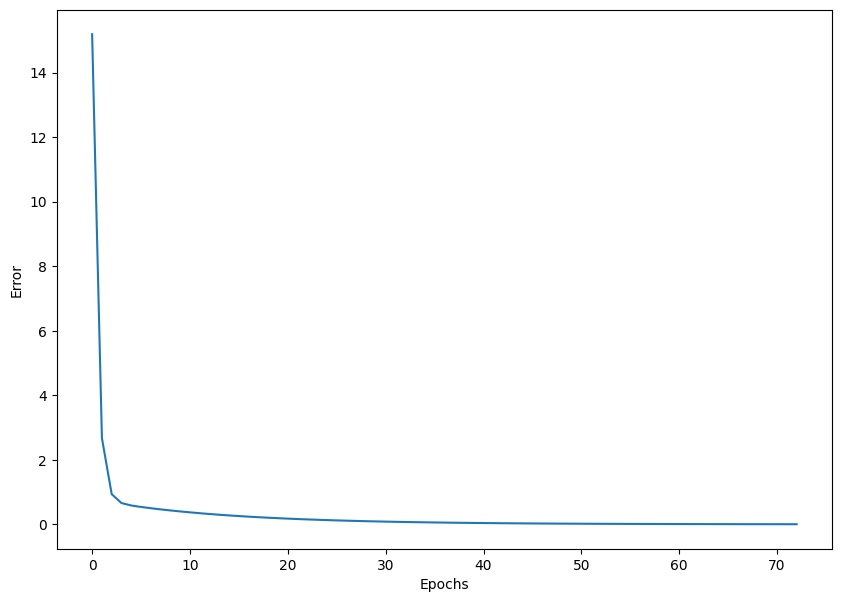

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

가중치가 난수 값에 의하여 다르게 초기화되기 때문에 매번 실행할 때마다 수렴하는 속도는 차이가 있다. 하지만 결국 목표하는 오차 범위 안으로 수렴하여 반복문을 종료하게 되고, 종료 후 w, b 계수를 확인하면 샘플 데이터셋을 생성할 때 설정한 w, b 계수와 비슷한 값임을 확인할 수 있다.

## **1-2. 딥러닝 프로세스**

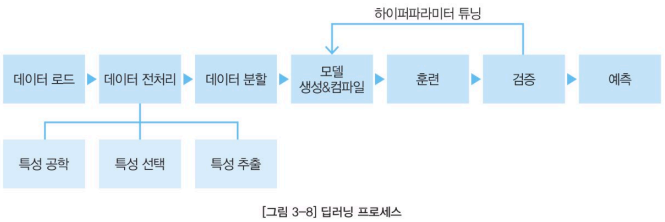

데이터 전처리, 모델의 생성, 컴파일, 훈련은 모델의 훈련을 위한 필수 프로세스로 누락되는 단계는 없다.
* 예측(predict) : 예측용 데이터셋을 입력하여 모델 예측 값을 얻는 과정
* 검증(evaluate) : 모델의 성능을 평가하는 단계

### **1-2-1 데이터 전처리**

데이터를 모델에 주입하기 전 데이터를 가공하는 단계. 데이터셋의 종류와 적용하려는 문제 유형에 따라 전처리 방법은 다양한다.

배열의 차원을 변경하거나 스케일을 조정할 수 있다. 전처리 단계에서 데이터셋의 형태나 차원을 미리 구상해야 다음 단계에서 모델을 설계할 때 입력할 데이터셋의 형태를 올바르게 정의할 수 있다. 전처리 단계에서 처리한 데이터셋의 형태와 다음 단계에서 생성할 모델이 입력받을 데이터셋의 형태가 다르다면 에러가 발생할 수 있다.

### **1-2-2 모델 생성**

모델의 구조를 정의하고 생성하는 단계. 모델을 생성하는 방법은 크게 3가지로 구분할 수 있다. 순차적인 구조의 모델은 Sequential API로 구현한다. 다중 입력 및 출력을 가지고 복잡한 구조를 갖는 모델은 Functional API 혹은 Model Subclassing 방법으로 구현할 수 있다.

### **1-2-3 모델 컴파일**

딥러닝 모델의 구조를 정의하고 생성한 뒤에는, 생성된 모델 훈련에 사용할 손실함수(loss), 옵티마이저(optimizer), 평가지표(metrics) 등을 정의한다. 모델 인스턴스에 `compile()` 메소드를 적용하고, 앞에서 열거한 여러 가지 속성 값을 설정한다.

### **1-2-4 모델 훈련**

`fit()` 함수에 모델 훈련에 필요한 정보를 매개변수(또는 파라미터)로 전달한다. 훈련 데이터셋, 검증 데이터셋, epoch, 배치(batch) 크기, 콜백(callback) 함수 등을 지정한다.

### **1-2-5 모델 검증**

* 훈련이 완료된 모델을 검증하는 단계.
* 모델을 훈련할 때 사용하지 않은 검증 데이터셋을 모델에 입력하고 모델의 예측 값을 정답과 비교하여 평가지표를 계산한다.
* 반환된 검증 결과를 토대로 잠재적인 모델의 성능 평가가 이뤄진다.
* 검증 결과를 바탕으로 다시 모델 생성 단계로 돌아가 모델을 수정하고, 컴파일 및 훈련 과정을 거쳐 재평가하는 단계를 통해 목표 성능에 도달할 때까지 이 과정을 계속 반복한다.

### **1-2-6 모델 예측**

훈련과 검증이 완료된 모델로 테스트셋에 대하여 예측하고 그 결과를 반환한다.

# **02 단순 신경망 훈련**

## **2-1 선형회귀**

* 회귀 분석 : 하나 이상의 독립변수들이 종속변수에 미치는 영향을 추정하는 통계 기법
  * 단순선형회귀(simple linear regression) 모형 : 하나의 $X$가 $Y$에 미치는 영향을 추정하며 1차 함수 관계로 나타낼 수 있다.
  $$y=ax+b$$
    * $X$ : 독립변수
    * $Y$ : 종속변수
    * $a$ : 기울기
    * $b$ : 절편. 그래프의 높낮이를 결정한다.

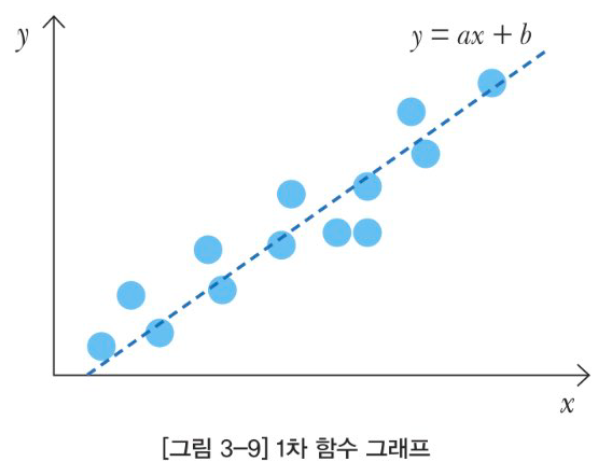

텐서플로 케라스를 활용한 단순선형회귀 모델 : 모델의 기울기 $a$와 절편 $b$를 업데이트하며 종속변수 $Y$에 가장 근사한 1차 함수식을 완성해 나간다.
* 딥러닝에서는 기울기 $a$ 대신 가중치(weight)를 의미하는 $w$를 더 많이 사용한다.
$$y=wx+b$$
$w$ : 가중치(weight)

  $b$ : 편향(bias)

## **2-2 뉴런(Neuron)**

뉴런 : 인공 신경망 모델을 구성하는 하나의 신경. (=노드(node))

신경망 : 여러 개의 레이어(layer)를 가지며 1개의 레이어는 1개 이상의 뉴런으로 구성된다. 뉴런의 내부에는 가중치가 존재하고 모델이 훈련을 진행하면서 오차 역전파를 통해 뉴런의 가중치가 업데이트된다.
* 역전파(back propagation) 알고리즘 : 신경망 모델의 파라미터들에 대한 그래디언트를 계산하는 방법을 의미한다. 역전파는 신경망을 구성하는 각 레이어와 관련된 손실함수를 미분한 결과인 그래디언트를 출력층에서 입력층 순으로 역으로 계산하고 저장한다.

## **2-3 Dense 레이어**

Dense 레이어/완전 연결층(Fully Connected Layer) : 심층 신경망 모델을 구성하는 가장 기본 레이어. 각 레이어와 레이어 사이에 모든 뉴런이 서로 연결되어 있다.

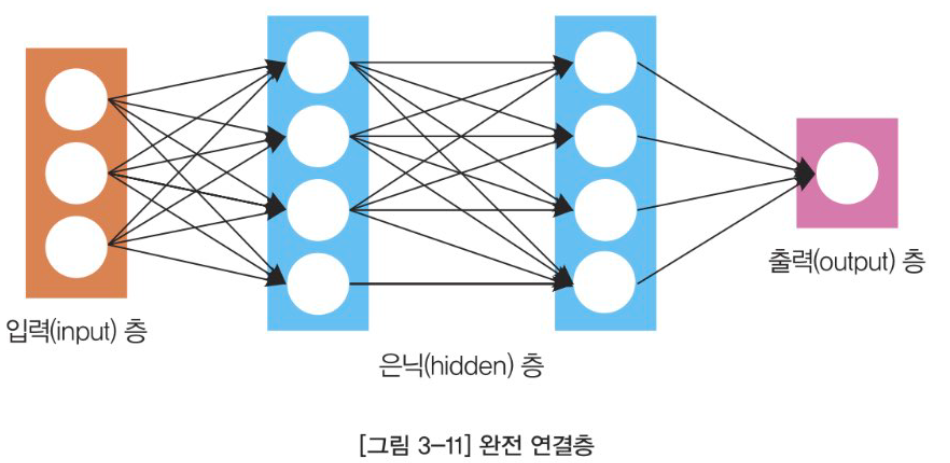

* 각 레이어는 1개 이상의 뉴런으로 구성된다.
* 모든 뉴런들이 정보(텐서)의 흐름을 나타내는 화살표로 연결되어 있어 **완전 연결층**이라고 정의한다.
  * 입력 레이어 1개 : 3개 뉴런
  * 은닉 레이어 2개
  * 출력 레이어 1개 : 1개 뉴런

* 텐서플로의 `layer` 모듈에 있는 Dense 레이어 : Dense 레이어를 구성하는 노드 개수와 활성화 함수를 지정할 수 있다
  * 노드의 개수 : Dense 레이어의 첫 번째 위치 인자로 지정
  * Dense 레이어의 activation 매개변수 : 활성화 함수를 지정하여 적용

In [ ]:
import tensorflow as tf

# 10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

# ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

<Dense name=dense_1, built=False>

## **2-4 데이터셋 만들기**

단순선형회귀 모형을 지도학습 방식으로 훈련하기 위해 $x$, $y$ 데이터를 생성한다.

* 넘파이 `arange()` 메소드를 활용하여 5개의 순차적인 $x$ 데이터를 생성하고, 임의의 1차 함수인 $y=3x+2$ 관계식에 대입하여 $y$ 데이터 5개를 생성한다.

In [ ]:
import numpy as np

# 샘플 데이터셋 생성
x=np.arange(1, 6)

# y=3x+2
y=3*x+2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


지도학습(supervised learning) : 정답이 있는 데이터를 활용해 데이터를 학습시키는 것.
* 피처(feature) : 모델에 주입할 입력 데이터
* 레이블(label) : 정답

생성한 데이터를 `matplotlib` 시각화 라이브러리를 활용하여 그래프를 출력한다.

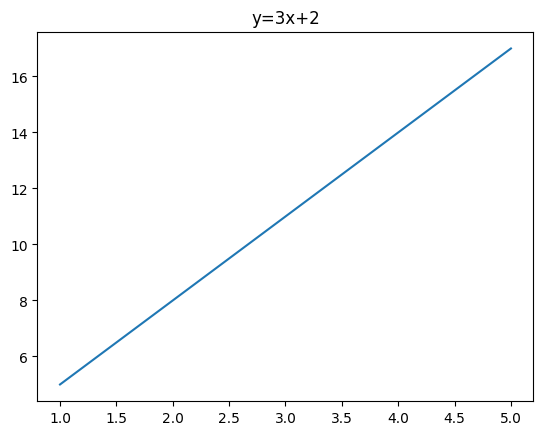

In [ ]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x, y)
plt.title('y=3x+2')
plt.show()

## **2-5 Sequential API**

Sequential API 방식 : 층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식. 입력 레이어부터 출력 레이어까지 순서를 갖는다.
* 입력 데이터는 시퀀스의 가장 앞에 위치한 층에 투입되고, 순서대로 각 층을 하나씩 통과하면서 딥러닝 연산을 수행한다.

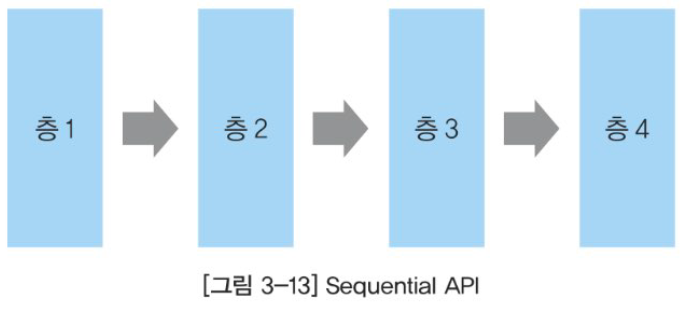

* 케라스 모델을 생성하고 훈련하는 가장 간단한 방법
* 2개 이상의 다중 입력이나 다중 출력을 갖는 복잡한 구조를 만들 수 없다.

➡️ Functional API 사용

### **2-5-1 모델 구조**

1. 리스트형 정의로 Sequential 클래스 함수에 파이썬 리스트 형태로 여러 개의 층을 입력한다.
* 대괄호 안에 쉼표로 구분하여 층을 쌓는다.
* 앞에 위치한 층부터 연산을 먼저 처리하고 순차적으로 다음 층의 연산을 수행하게 된다.
* Dense 레이어 3개를 갖는 모델

In [ ]:
import tensorflow as tf

# 리스트형
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

2. `add` 함수로 레이어를 추가하여 Sequential 클래스 객체를 먼저 만든 뒤, 생성된 모델 인스턴스에 층을 추가하는 방식
* `add()` 메소드 함수 하나 당 1개 층 추가

In [ ]:
# add 함수로 레이어 추가
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

* Sequential API를 활용하여 모델을 만들 때, 쌓고자 하는 레이어의 개수는 제한이 없다.

### **2-5-2 입력 데이터 형태**

Sequential API를 사용하여 모델을 구성할 때 첫 번째 층은 `input_shape` 매개변수를 지정해야 한다.
* `input_shape` : 주입할 데이터셋의 `shape`을 튜플 혹은 리스트로 지정할 수 있다.
  * shape이 (150, 4)로 구성되었다면 `input_shape`은 (4,) 혹은 [4]로 지정할 수 있다.

In [ ]:
import tensorflow as tf

model=tf.keras.Sequential([
    # 입력 데이터의 shape=(150, 4)인 경우 input_shape 지정
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **2-5-3 단순선형회귀 모델 정의**

1개의 뉴런을 가지는 Dense 레이어 한 개를 사용한다. 여기에 정의한 1개의 뉴런은 기울기에 해당하는 $w$와 상수항에 해당하는 $b$를 매개변수로 갖는다.

* 1차 함수식 $y=wx+b$에서 입력 데이터는 $x$ 값을 나타내는 입력 변수 1개만 존재하기 때문에 `input_shape=[1]`로 지정한다.
* 1개의 뉴런을 가지는 Dense 레이어는 1개의 출력 값을 가지므로, 출력 값은 $y$에 대한 모델의 예측 값이다.

In [ ]:
# 단순선형회귀 모델 생성
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


* Dense 레이어는 `use_bias=True`가 기본 설정되어 상수항 $b$가 추가된다.
* `use_bias=False` : 상수항 $b$를 포함하지 않는다.

## **2-5 모델 요약**

Sequential API로 모델을 만들었다면 `model.summary()`로 모델의 요약을 확인할 수 있다.

모델의 구조를 확인할 수 있으며 층별 노드의 개수가 표기된다. 요약의 하단에는 훈련 시 업데이트할 파라미터의 개수가 표기된다.

In [ ]:
# 모델 요약
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params : 모델 내부에 존재하는 모든 파라미터의 합계 표기
* Trainable params : 모델 훈련 시 업데이트할 파라미터의 총 개수
* Non-trainable params : 훈련 시 업데이트하지 않을 파라미터의 총 개수

* 단순선형회귀 모델에서 업데이트 파라미터는 가중치 $w$와 편향 $b$ 2개다.

## **2-7 컴파일**

모델의 훈련 과정에 적용할 옵티마이저, 손실함수, 평가지표를 정의한다.
1. 클래스 인스턴스 : 학습률, 모멘텀 등 하이퍼파라미터를 사용자가 직접 지정할 수 있다.
2. 함수
3. 사전 정의된 문자열 : 기본값으로 설정된 하이퍼파라미터 사용. 하이퍼파라미터 수정은 어렵다.

In [ ]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error'])

In [ ]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [ ]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()
                       ])

* 옵티마이저 : 확률적 경사하강법 알고리즘인 'sgd'
* 손실함수 : 평균제곱오차 'mse'
* 평가지표 : 평균절대오차 'mae'

In [ ]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

## **2-8 훈련**

생성한 모델 인스턴스에 `fit()` 메소드를 적용하면, 데이터를 입력하여 모델을 훈련할 수 있다.
* 모델 훈련 : 가중치 텐서 업데이트

`fit()` 메소드
* 훈련용 데이터셋의 입력과 정답에 해당하는 출력, 반복 훈련할 epoch 수를 지정한다.
* 매 epoch가 끝날 때마다 훈련 데이터셋에 대한 손실과 평가지표를 출력한다.
* `verbose=0` 옵션 : 훈련 중간 과정을 출력하지 않는다.

`fit()` 메소드에 검증 데이터셋(`validation_data`) 옵션을 지정했다면 검증 셋에 대한 손실과 평가지표도 함께 출력한다.

In [ ]:
# 훈련
model.fit(x, y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step - loss: 221.2331 - mae: 13.7955
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 128.9772 - mae: 10.5645
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 75.2146 - mae: 8.0980
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 43.8841 - mae: 6.2150
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 25.6259 - mae: 4.7774


* 손실함수 : 25.6259
* 평균절대오차(mae) : 4.7774

* 모델의 예측 오차(손실함수)가 점점 줄어든다.

➡️ 반복 훈련 횟수가 충분하지 않아 학습이 덜 되었다고 볼 수 있다. epoch를 늘려 추가 학습을 하면 손실을 더욱 낮출 수 있을 것으로 보인다.

➡️ 모델은 현재 과소적합 상태

* `epoch` 1200 지정
* 모델 인스턴스 새로 생성하고 컴파일한다. `history` 변수를 생성하고 `fit()` 메소드에 대한 반환값을 대입한다. `fit()` 메소드가 반환하는 `history` 변수는 epoch별 훈련 손실과 평가지표가 딕셔너리 형태로 저장된다.

In [ ]:
# 단순 선형회귀 모델 생성
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history=model.fit(x, y, epochs=1200)

Epoch 1/1200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - loss: 126.3315 - mae: 10.5010
Epoch 2/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 73.7149 - mae: 8.0608
Epoch 3/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 43.0519 - mae: 6.1978
Epoch 4/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 25.1824 - mae: 4.7755
Epoch 5/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 14.7683 - mae: 3.6896
Epoch 6/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 8.6989 - mae: 2.8604
Epoch 7/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 5.1613 - mae: 2.2274
Epoch 8/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 3.0991 - mae: 1.7439
Epoch 9/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.8968 - mae: 1.3747
Epoch 10/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.1955 - mae: 1.0927
Epoch 11/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.7862 - mae: 0.8773
Epoch 12/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.5471 - mae: 0.7128
Epoch 13/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

* mse, mae 모두 개선되었다.
* 저장된 `history` 변수를 사용하여 epoch별 훈련 손실 및 평가지표를 시각화할 수 있다.

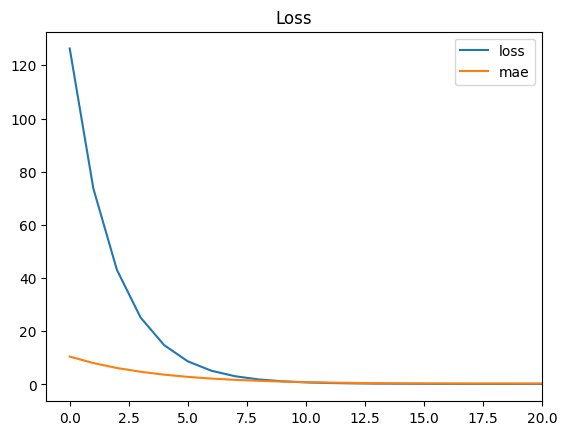

In [19]:
import matplotlib.pyplot as plt

# 20 epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()
plt.show()

첫 10 epoch까지 손실이 급격히 감소하는 것을 볼 수 있다. 10 epoch를 넘어가면 감소 폭이 둔화되면서 조금씩 감소하는 것을 확인할 수 있다.

➡️ 모델 훈련 초기 단계에는 학습이 매우 빠른 속도로 진행되다가 일정 epoch 이후에는 학습 속도가 느려지는 패턴을 보이고 있다.

## **2-9 검증**

모델 인스턴스의 `evaluate()` 메소드로 모델의 성능을 검증할 수 있다. 일반적으로 검증 데이터셋을 입력하여 검증한다.
* 별도의 검증 셋을 만들어 두지 않았으므로 훈련 데이터셋의 $x$, $y$를 대입하여 반환되는 결과를 확인한다.

In [20]:
# 검증
model.evaluate(x, y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - loss: 6.8419e-05 - mae: 0.0071


[6.841916183475405e-05, 0.007099723909050226]

모델 훈련 단계에서 1,200번 epoch를 종료한 상태에서 출력된 값과 같다. 검증 단계에서는 모델이 훈련을 마친 상태의 가중치를 그대로 적용하여 손실과 평가지표를 계산하기 때문이다.
* 교차 검증(cross-validation) : 사전에 별도의 검증 데이터셋을 준비하여 모델의 성능을 평가하는 것. 홀드 아웃, K-Fold 교차 검증 등

## **2-10 예측**

훈련이 완료된 모델 인스턴스의 `predict()` 메소드에 새로운 입력 데이터를 넣어 주면 모델의 예측 값을 얻을 수 있다.
* 예측을 위한 입력 $x$를 `predict()`의 인자로 지정한다.

In [22]:
# 예측
model.predict(np.array([[10]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[32.034313]], dtype=float32)

데이터셋 생성 시 정의한 1차식이 $y=3x+2$였고, $x=10$일 때 $y=32$임을 감안한다면 정답에 꽤 근사한 값을 예측한 것을 확인할 수 있다.

# **03 심층 신경망으로 이미지 분류**

이미지 분류를 위해 단층이 아닌 더 깊은 층을 쌓아 깊이가 있는 딥러닝 모델을 생성한다(이처럼 모델에 여러 층을 구성하여 깊이가 있다는 의미에서 딥러닝이라고 부른다).

## **3-1 케라스 내장 데이터셋 로드**

In [23]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist=tf.keras.datasets.mnist

In [24]:
# load_data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


* 훈련 셋 : 60,000개의 데이터
  * `shape` : (데이터셋 크기, 28, 28). 28, 28은 순서대로 이미지의 세로, 가로의 픽셀 크기를 나타낸다.

  ➡️ $28\times28$ 픽셀 크기의 정사각형 이미지

* 검증 셋 : 10,000개 데이터
  * 1차원 벡터 형태

In [25]:
# 로드된 데이터 형태
print('train set :', x_train.shape, y_train.shape)
print('test set :', x_test.shape, y_test.shape)

train set : (60000, 28, 28) (60000,)
test set : (10000, 28, 28) (10000,)


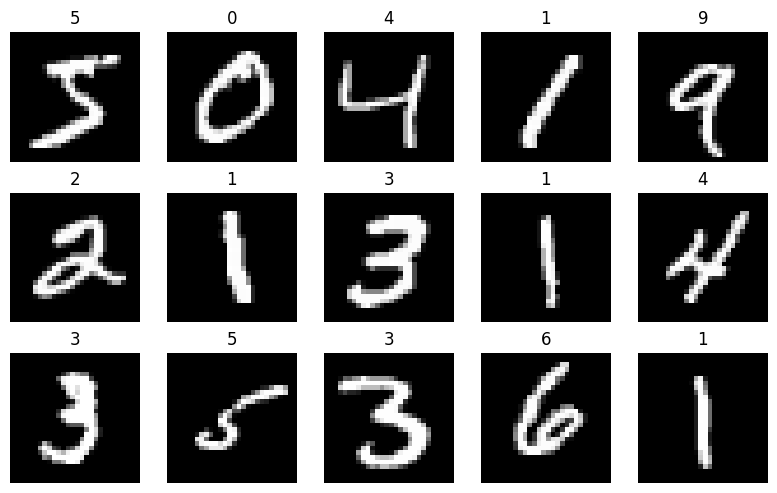

In [28]:
# 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes=plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
  ax=axes[i//5, i%5]
  # imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

## **3-2 데이터 전처리**

이미지 데이터에 대하여 정규화를 통해 데이터의 범위를 조절한다.

`x_train`은 넘파이 배열이며, 배열의 각 원소는 이미지를 구성하는 하나의 픽셀 값과 일대일 매칭된다.

In [29]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

0-255 범위의 값으로 이루어진 것을 확인할 수 있다. 데이터의 범위를 0-1 사이의 값을 가지도록 정규화하기 위해서는 데이터의 최댓값인 255로 나눈다.

In [30]:
# 픽셀 값의 최소/최댓값 확인
print(f'정규화 전] 최솟값 : {x_train.min()}, 최댓값 : {x_train.max()}')

# 데이터 정규화
x_train=x_train/x_train.max()

# 정규화 후 최소/최댓값 확인
print(f'정규화 후] 최솟값 : {x_train.min()}, 최댓값 : {x_train.max()}')

정규화 전] 최솟값 : 0, 최댓값 : 255
정규화 후] 최솟값 : 0.0, 최댓값 : 1.0


In [31]:
# test 셋에도 정규화 동일 적용
x_test=x_test/x_test.max()

In [32]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

* 정규화하는 이유는 입력 데이터가 정규화되어 모델이 학습하는 경우 경사하강법 알고리즘에 의한 수렴 속도가 비정규화된 입력 데이터를 가질 때보다 더 빨리 수렴하기 때문이다. 또한 국소 최적(local optimum)에 빠지는 현상을 방지해주는 효과도 있다.

## **Flatten  레이어**

정규화가 끝난 `x_train`의 `shape`은 (60000, 28, 28)이다. 즉, 정규화를 하더라도 개별 데이터 값의 범위는 축소되지만, 원본 배열의 형태는 그대로 유지된다. 여기서 60000은 데이터셋의 크기를 나타내고 28, 28은 이미지의 크기를 나타낸다.

샘플 이미지의 형태는 (28, 28)로 이루어져 있고 2차원 입력이다.

⚠ Dense 레이어에는 입력값으로 반드시 1차원 배열이 들어가야 한다.

➡️ 1. 이미지 데이터를 1차원으로 전처리하여 주입해야 한다.

In [33]:
print(f'변경 전 shape : {x_train.shape}')
print(f'1D로 shape 변경 후 : {x_train.reshape(60000, -1).shape}')

변경 전 shape : (60000, 28, 28)
1D로 shape 변경 후 : (60000, 784)


2. Flatten 레이어를 사용하면 다차원 데이터를 1차원으로 펼쳐주는 방법도 가능하다.

In [34]:
print(f'변경 전 shape : {x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후 : {tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape : (60000, 28, 28)
Flatten 적용 후 : (60000, 784)


## **3-4 활성화 함수**

입력을 비선형 출력으로 변환해주는 함수이다. 일반적으로 선형관계를 나타내는 함수에 비선형성을 추가하는 방법으로 표현되기도 한다. 비선형성을 추가하지 않고 선형 함수로만 층을 구성한다면 모델을 깊게 구성하더라도 결국은 선형함수로 표현된다.
* 시그모이드, 하이퍼볼릭 탄젠트, ReLU, Leaky ReLU

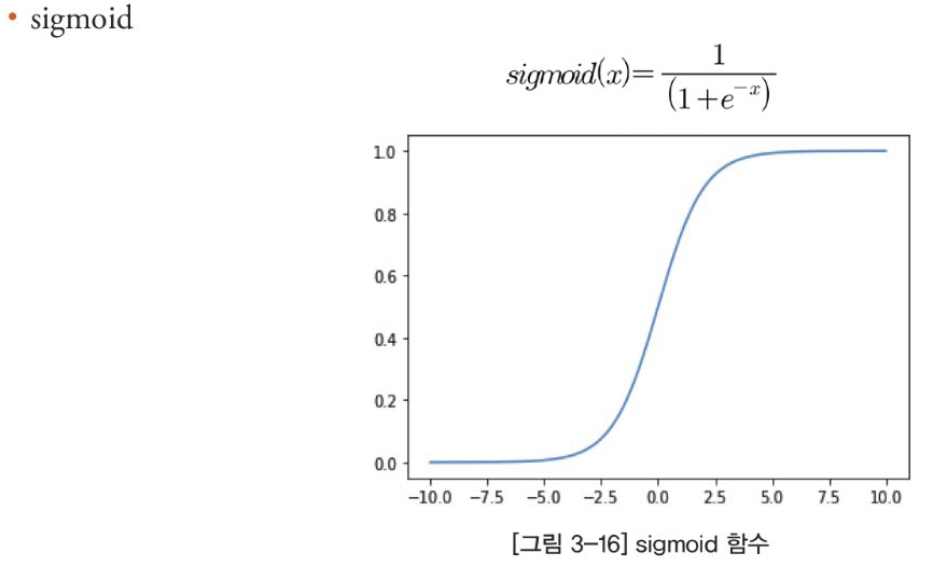

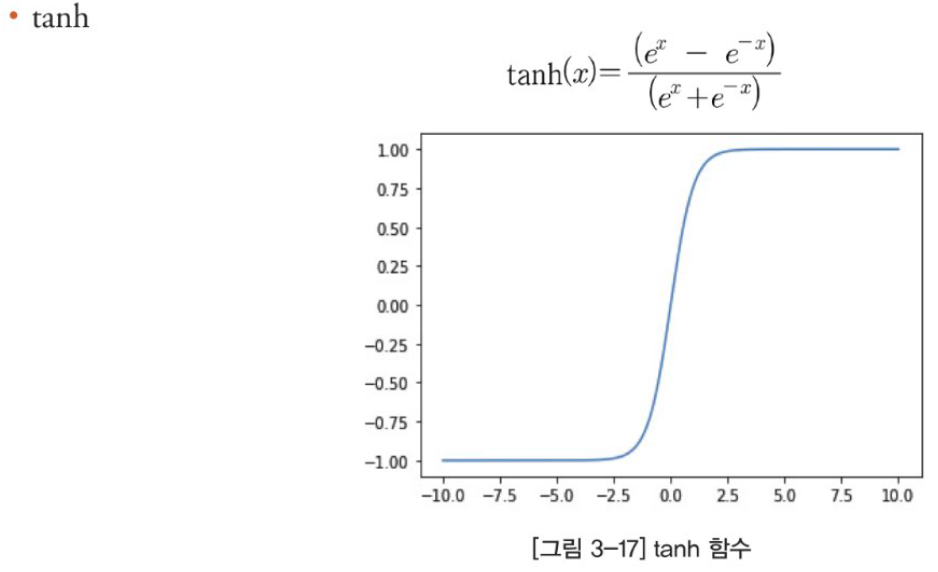

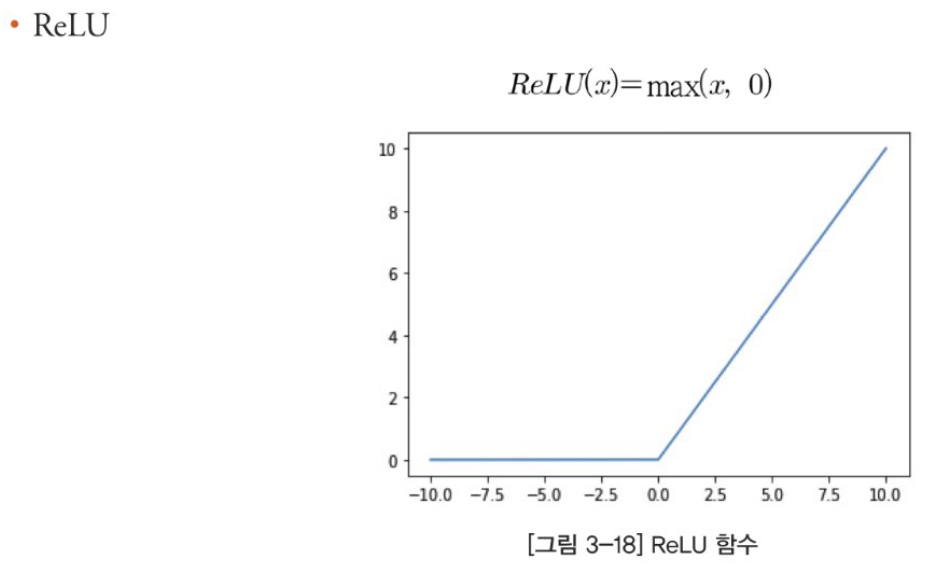

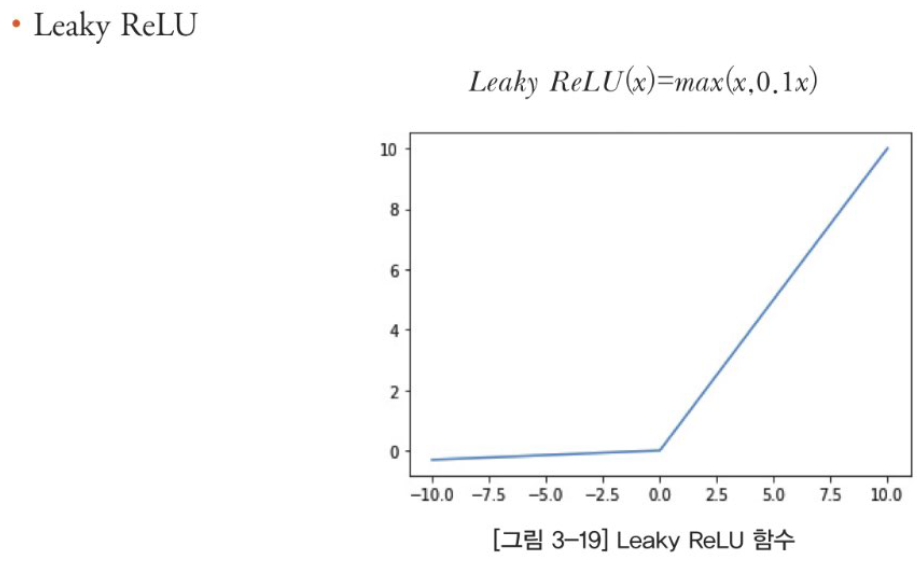

Dense 레이어에 ReLU 활성화 함수를 적용하기 위해서는
1. `activation` 매개변수에 'relu' 문자열을 대입한다.

In [35]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

<Dense name=dense_14, built=False>

2. 별도의 층처럼 적용할 수도 있다.
* Dense 레이어 다음에 배치 정규화를 적용한 후 활성화 함수를 적용하고자 할 때 많이 사용된다. 즉, 레이어 구성을 조금 더 커스터마이징하고 싶을 때 구분하여 처리한다.

In [36]:
# Dense 레이어와 relu 활성화 함수 레이어를 별도 적용한 경우
model=tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

## **3-5 입력과 출력**

딥러닝 모델을 만들 때는 첫 번째 레이어에 입력 데이터의 형태를 나타내는 `input_shape` 매개변수를 지정하는 것이 일반적이다. 앞에서 `x_train`의 `shape`은 (6000, 28, 28) 배열이라는 것을 확인했다. 여기서 데이터셋의 크기를 나타내는 60000이라는 숫자를 제외하고 이미지의 세로, 가로 형태를 나타내는 `input_shape=(28, 28)`를 `input_shape`로 지정한다.

분류 모델의 가장 마지막 레이어는 출력층이다. 출력층의 노드 개수는 반드시 분류해야 할 클래스의 개수와 동일해야 한다. `mnist`는 0-9, 총 10개의 클래스로 이루어져 있기 때문에 마지막 출력층의 노드 개수는 10개가 되어야 한다.

In [37]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # 노드=10개(클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Dense 레이어의 노드 개수는 256, 64, 32, 10으로 조금씩 개수가 줄어드는 형태로 구성하였다. Flatten 층으로 이미지를 펼치면 784개의 픽셀 값이 각각 입력 변수가 된다. 784개의 변수에 대한 입력값을 노드 개수를 조금씩 줄여가면서 최종 출력 클래스 개수인 10개까지 정보를 축약하기 위한 설계라고 이해하자.

모델의 깊이(레이어의 개수)와 너비(각 레이어를 구성하는 노드의 개수)에 대한 정답은 없다. **최적의 모델을 찾기 위해서는 여러 가지 시도를 통해 최적의 모델 형태를 찾을 필요가 있다.** 레이어 개수와 노드 개수도 중요한 하이퍼파라미터가 된다고 볼 수 있다.

출력층의 노드의 개수가 2개 이상인 경우는 softmax 활성화 함수를 적용한다. 즉, 다중 분류 문제에서는 softmax 활성화 함수를 사용해야 한다. 반면 이진 분류 모델의 출력층 노드 개수를 1개로 설정한 경우에는 sigmoid 활성화 함수를 적용한다(단, 이진 분류 모델이더라도 출력 레이어의 클래스를 원핫 인코딩으로 변환하여 노드 개수가 2개인 경우에는 softmax 함수를 사용한다).

In [38]:
# 출력층 노드=1인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 출력층 노드=2개 이상인 경우, softmax
tf.keras.layers.Dense(2, activation='softmax')

<Dense name=dense_21, built=False>

## **3-6 손실함수**

분류 모델의 손실함수는 모델의 출력층에 따라 올바른 손실함수를 설정해야만 모델이 정상적으로 훈련할 수 있다.

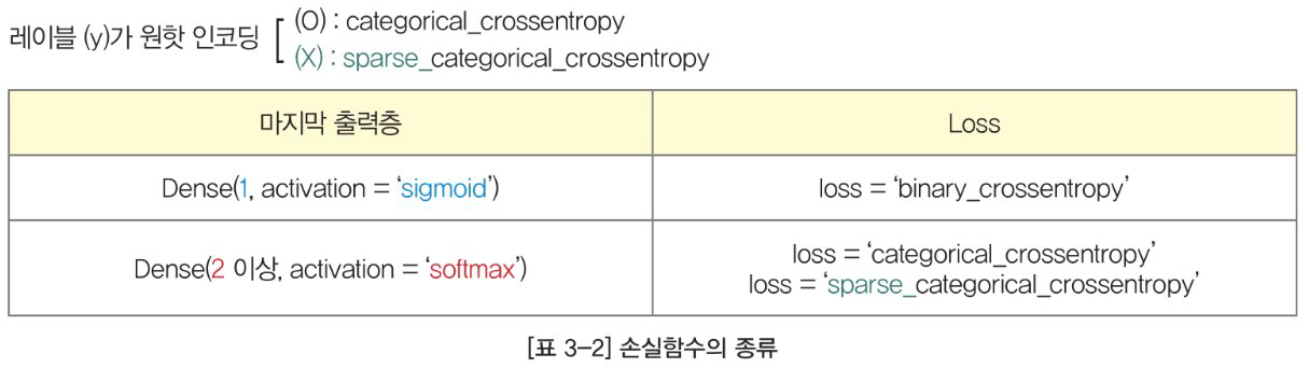

* 이진 분류기 생성 시 출력층의 노드 개수가 1이면 `activation='sigmoid'`, 손실함수 'binary_crossentropy'

In [39]:
# 이진 분류(출력 노드 개수=1, sigmoid인 경우)
model.compile(loss='binary_crossentropy')

* 출력층의 노드 개수가 2개 이상일 경우 `activation='softmax'`와 같이 softmax 활성화 함수를 지정하고, 손실함수는 'categorical_crossentropy' 혹은 'sparse_categorical_crossentropy'를 지정한다.

* 출력 데이터가 원핫 벡터인 경우 'categorical_crossentropy'를 지정하고, 원핫 벡터가 아닌 경우 'sparse_categorical_crossentropy'를 지정한다.

In [40]:
# y가 원핫 벡터인 경우
model.compile(loss='categorical_crossentropy')
# y가 원핫 벡터가 아닌 경우
model.compile(loss='sparse_categorical_crossentropy')

mnist 손글씨 데이터셋은 클래스의 개수가 10개이므로 마지막 출력층에 해당하는 Dense 레이어의 노드 개수를 10으로 지정했다. 출력 데이터가 원핫 벡터가 아니고, 0-9까지 레이블 값을 갖기 때문에 손실함수로 'sparse_categorical_crossentropy'를 지정하면 된다.

## **3-7 옵티마이저**

손실을 낮추기 위해서, 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는데 사용되는 최적화 방법이다.

일반적으로 많이 사용되는 알고리즘은 `Adam`이다.

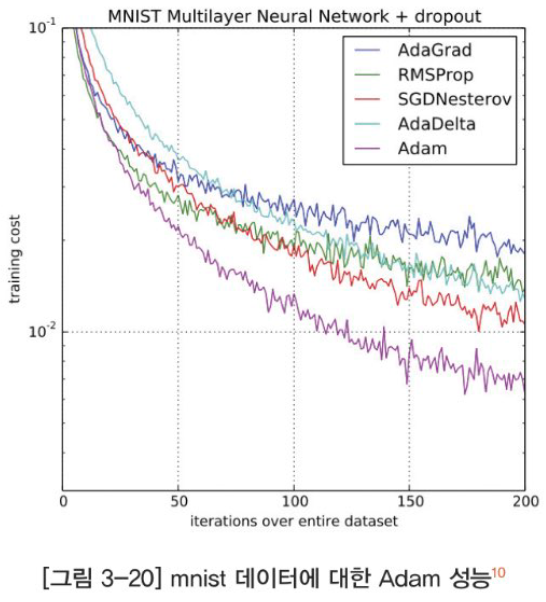

클래스 인스턴스로 지정하거나 문자열로 지정할 수 있다.

1. 문자열로 지정 : 클래스 이름을 소문자로 표기
2. 클래스 인스턴스로 지정 : 학습률(lr)과 같은 하이퍼파라미터를 직접 설정할 수 있다.

In [42]:
# 클래스 인스턴스로 지정
adam=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

## **3-8 평가지표**

* accuracy : 정확도
* auc, precision, recall

모델 컴파일 단계에서 metrics 매개변수에 파이썬 리스트 형태로 하나 이상의 평가지표를 지정하여 여러 지표들을 동시에 참고할 수 있다.

클래스 인스턴스로 지정하거나 문자열로 지정할 수 있다.

In [43]:
# 클래스 인스턴스로 지정
acc=tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [44]:
# 문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## **3-9 훈련**

모델을 훈련할 때 검증 셋을 추가 지정하면, 매 epoch마다 훈련 손실과 검증 손실, 그리고 각 셋에 대한 평가지표를 나란히 출력한다. 검증 셋을 지정하는 방법은 `validation_data` 매개변수에 튜플 형식의 검증 셋을 지정해주면 된다.

In [45]:
# 훈련
model.fit(x_train, y_train,
          # 검증 셋 지정
          validation_data=(x_test, y_test),
          epochs=10,
          )

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8821 - loss: 0.4005 - val_accuracy: 0.9624 - val_loss: 0.1226
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9704 - loss: 0.0961 - val_accuracy: 0.9711 - val_loss: 0.0954
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9809 - loss: 0.0618 - val_accuracy: 0.9741 - val_loss: 0.0810
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9844 - loss: 0.0482 - val_accuracy: 0.9808 - val_loss: 0.0691
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9891 - loss: 0.0354 - val_accuracy: 0.9764 - val_loss: 0.0787
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9909 - loss: 0.0283 - val_accuracy: 0.9785 - val_loss: 0.0793
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9926 - loss: 0.0243 - val_accuracy: 0.9790 - val_loss: 0.0805
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9920 - loss: 0

## **3-10 평가**

10회의 epoch가 끝나고 훈련이 종료된 뒤 `evaluate()` 메소드로 모델 성능을 검증하고 평가 결과를 확인할 수 있다. 이때 검증 셋인 `x_test`, `y_test`를 함수에 전달한다.

In [46]:
# 검증
test_loss, test_acc=model.evaluate(x_test, y_test)

print('검증 셋 정확도 :', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9706 - loss: 0.1247
검증 셋 정확도 : 0.9754999876022339


`evaluate()` 메소드는 컴파일 단계에서 지정한 손실과 정확도를 순서대로 반환하며, 그 중 정확도만 따로 지정하여 출력해보면 모델의 검증 성능이 약 97.5% 정도 기록한 것을 확인할 수 있다.

## **3-11 예측**

훈련된 모델로 새로운 이미지에 대한 분류 값을 예측하는 작업을 수행할 수 있다. `predict()` 메소드에 이미지 데이터를 넣어주면 모델의 예측 결과를 반환한다. 여기서는 예측에 필요한 새로운 데이터셋이 준비되어 있지 않기 때문에, 검증 데이터셋의 입력 데이터인 `x_test`를 사용한다.

In [47]:
# 예측
predictions=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


`predictions` 변수에 모델이 예측한 분류 결과를 넘파이 배열 형태로 저장한다. 첫 번째 입력 이미지에 대한 분류 결과를 출력해보면 다음과 같이 10개의 확률값들이 출력되는 것을 확인할 수 있다.

In [48]:
# 예측 결과 출력
predictions[0]

array([1.17502520e-14, 1.36070042e-13, 9.81516626e-13, 2.24091058e-12,
       7.44722548e-14, 3.11021532e-17, 4.94739451e-16, 9.99999940e-01,
       1.30241109e-15, 1.06859925e-08], dtype=float32)

모델의 마지막 출력층의 노드 개수가 10개로 지정되었기 때문에 10개의 값이 출력된 것이다. softmax 활성화 함수를 거친 10개의 출력 값은 순차적으로 0-9까지의 10개의 개별 클래스에 대한 분류 확률값을 나타낸다. **이 중 가장 높은 확률값을 가진 클래스가 최종 예측된 클래스다.** 넘파이 배열의 `argmax`를 활용하여 가장 높은 확률값을 가지는 클래스 결과를 확인할 수 있다.

In [49]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


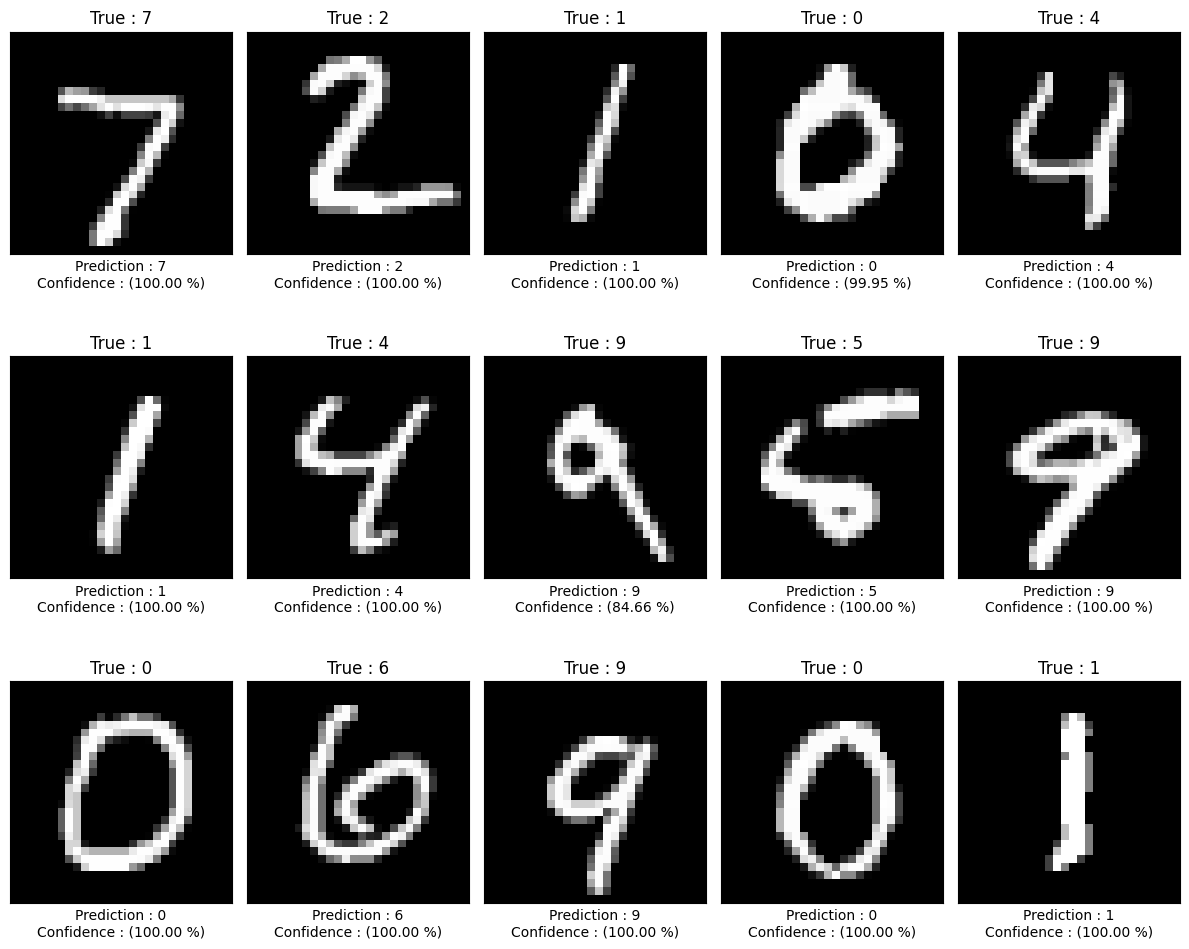

In [53]:
# 데이터 시각화
import matplotlib.pyplot as plt

def get_one_result(idx):
  img, y_true, y_pred, confidence=x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

# canvas 생성
fig, axes=plt.subplots(3, 5)
fig.set_size_inches(12, 10)
for i in range(15):
  ax=axes[i//5, i%5]
  img, y_true, y_pred, confidence=get_one_result(i)
  # imshow로 이미지 시각화
  ax.imshow(img, cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True : {y_true}')
  ax.set_xlabel(f'Prediction : {y_pred}\nConfidence : ({confidence:.2f} %)')
plt.tight_layout()
plt.show()